In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv("Airline_Dataset.csv", encoding="utf-8")
#print(df.count())

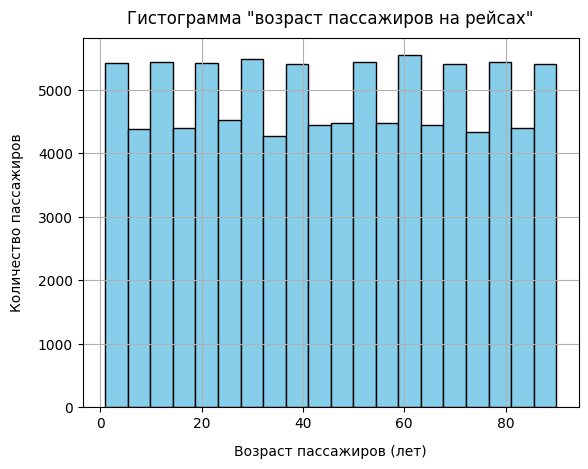

In [82]:
plt.hist(df['Age'], bins=20,color="skyblue", edgecolor = "black") # bins определяет количество интервалов или столбцов

plt.xlabel('Возраст пассажиров (лет)', labelpad=10)
plt.ylabel('Количество пассажиров', labelpad=10)
plt.title('Гистограмма "возраст пассажиров на рейсах"',  pad=10)
plt.grid(True) #сетка

plt.show()

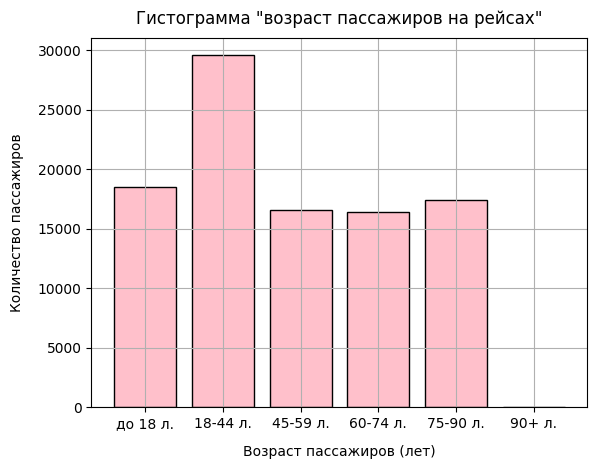

In [85]:
_18 = df[df['Age'] < 18]
_18_44 = df[(df['Age'] >= 18) & (df['Age'] <= 44)]
_45_59 = df[(df['Age'] >= 45) & (df['Age'] <= 59)]
_60_74 = df[(df['Age'] >= 60) & (df['Age'] <= 74)]
_75_90 = df[(df['Age'] >= 75) & (df['Age'] <= 90)]
_90 = df[df['Age'] >= 91]

ages = ['до 18 л.', '18-44 л.', '45-59 л.', '60-74 л.','75-90 л.', '90+ л.']
count_people = [len(_18), len(_18_44), len(_45_59), len(_60_74), len(_75_90), len(_90)]
plt.bar(ages, count_people, color='#ffc0cb', edgecolor='black')

plt.xlabel('Возраст пассажиров (лет)', labelpad=10)
plt.ylabel('Количество пассажиров', labelpad=10)
plt.title('Гистограмма "возраст пассажиров на рейсах"',  pad=10)
plt.grid(True) #сетка

plt.show()

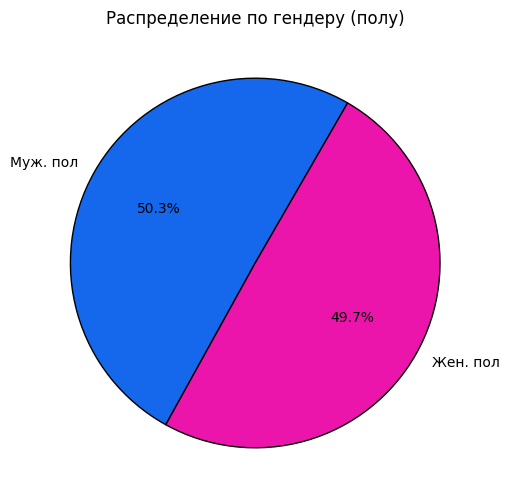

In [11]:
gender_counts = df['Gender'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=["Муж. пол", "Жен. пол"], autopct='%1.1f%%', startangle=60, colors=['#1567eb', '#eb15ab'], wedgeprops={'edgecolor': 'black'})
#autopct - формат отображения %

plt.title('Распределение по гендеру (полу)')
plt.show()

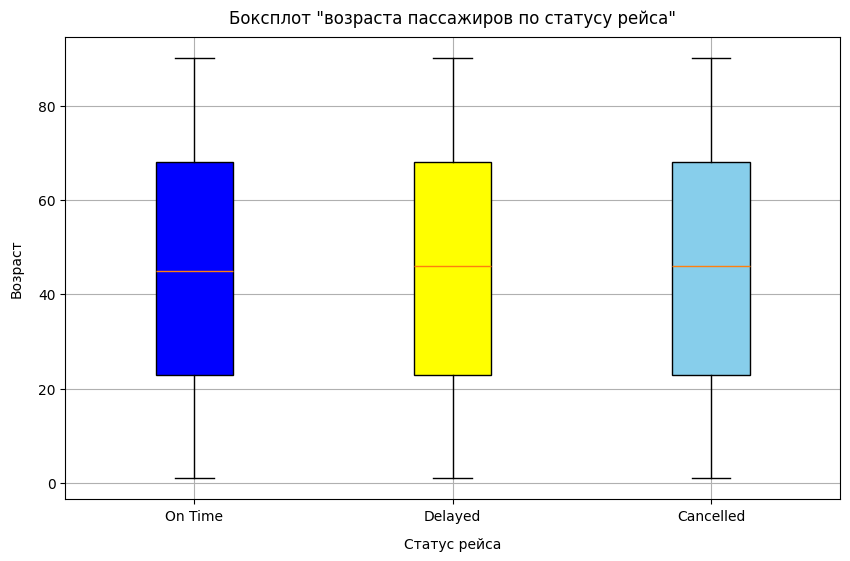

In [80]:
#УСАТЫЙ ЯЩИК
# Группировка данных по статусу рейса и извлечение возрастов
flight_statuses = df['Flight Status'].unique()
age_by_status = [df[df['Flight Status'] == status]['Age'] for status in flight_statuses] #список подсписков

# Создаем боксплот с явным заданием цветов
plt.figure(figsize=(10, 6))
bp = plt.boxplot(age_by_status, labels=flight_statuses, showfliers=True, patch_artist=True) #show - выбросы
                                                                                            # patch - дает настройку цвета

# Задаем цвета для каждой "коробки" (ящика)
colors = ['blue', 'yellow', 'skyblue']
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
plt.title('Боксплот "возраста пассажиров по статусу рейса"',pad=10)
plt.xlabel('Статус рейса', labelpad=10)
plt.ylabel('Возраст', labelpad=10)

plt.grid(True) #сетка
plt.show()


In [74]:
#PLOTLY
# Группируем данные по национальности и вычисляем средний возраст для каждой национальности
average_age_by_nationality = df.groupby('Nationality')['Age'].mean().reset_index()
fig = px.bar(average_age_by_nationality, x='Nationality', y='Age')
fig.update_layout(
    title_text='Гистограмма "количество пассажиров по национальности"',
    title_x=0.5,  # Смещение
    title_y=0.97
)

fig.update_xaxes(title_text='Национальность')
fig.update_layout(
    yaxis_title='Средний возраст',
    yaxis=dict(
        title_standoff=30,  # Устанавливаем смещение по вертикали
    ),
    xaxis=dict(
        title_standoff=0 
    )
)

fig.show()

In [2]:
fig = px.pie(df, names='Flight Status')
fig.update_layout(
    title_text='Круговая диаграмма "статусы рейсов"',
    title_x=0.5,  # Центрируем заголовок по горизонтали
)
# Отображаем диаграмму
fig.show()


In [17]:
# fig = px.box(df, y='Age', boxpoints='all')\
fig = px.box(df, y='Age')
fig.update_layout(
    title_text='Боксплот-диаграмма возраста пассажиров',
    title_x=0.5,  # Центрируем заголовок по горизонтали
)
fig.update_yaxes(showgrid=True, title_text='Возраст', gridcolor='black')
fig.show()